In [1]:
## Loading required package: limma
library(limma)
library(RColorBrewer)
library(mixOmics)
library(ggplot2)
library(edgeR)
library(HTSFilter)
library(Matrix)
library(plyr)
library(magrittr) # needs to be run every time you start R and want to use %>%
library(Rcpp)
library(dplyr)    # alternatively, this also loads %>%
# First reading the data
options(warn=-1)

#The root directory
dir="../counts"
setwd(dir)

Loading required package: MASS

Loading required package: lattice

Loading required package: ggplot2


Loaded mixOmics 6.10.9
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')



Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Comparison between bsj and linear exonic gene expression

#### Bovine

In [2]:
Data = read.table("bos_taurus_bsj_linear_counts.tsv", header=T, sep="\t")

In [4]:
Counts = round(data.frame(Data[,-1], row.names = Data[,1]))
pseudoCounts <- log2(Counts+1)

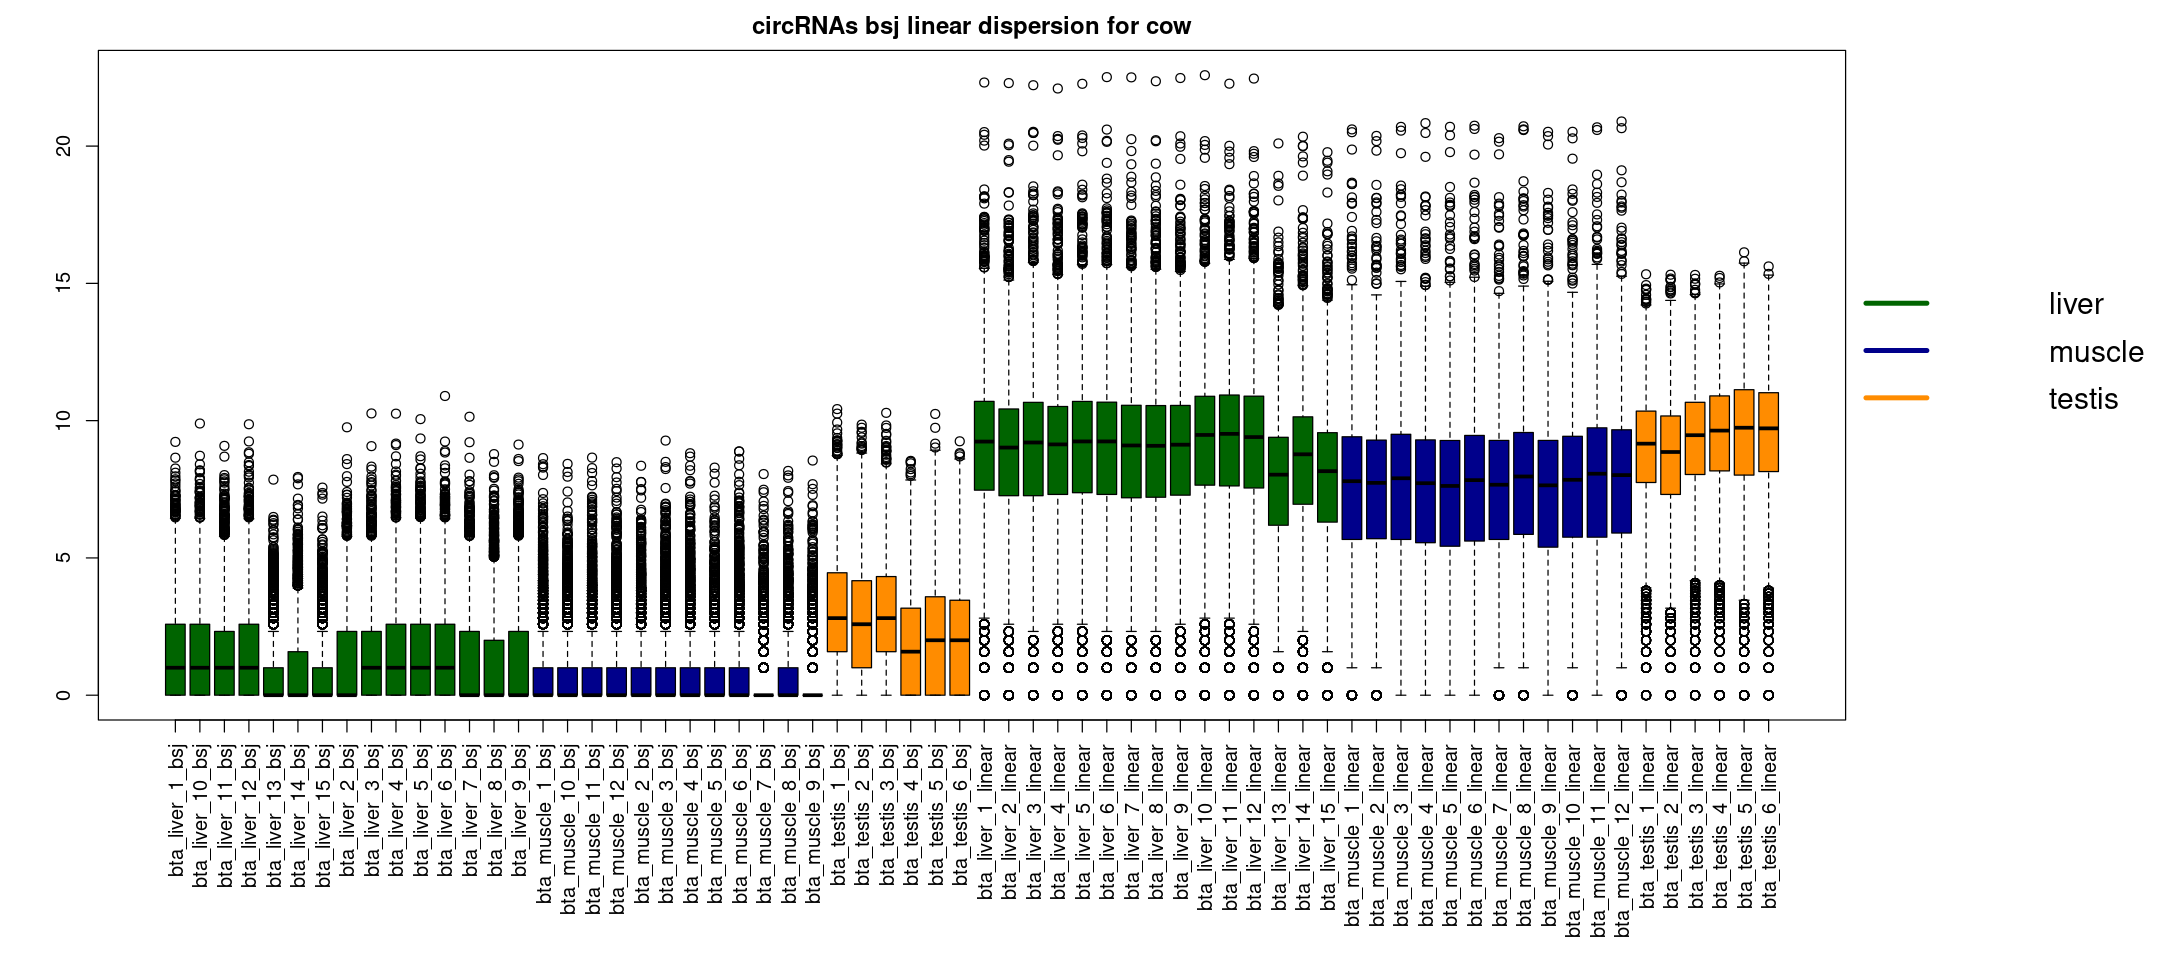

In [5]:
options(repr.plot.width=18, repr.plot.height=8)
colors =  c(rep("darkgreen", 15), rep("darkblue", 12), rep("darkorange", 6), rep("darkgreen", 15), rep("darkblue", 12), rep("darkorange", 6))
par(mar=c(10, 4.1, 2.1, 13.1))
par(xpd=FALSE)
boxplot(pseudoCounts, col=colors, las=3, main="circRNAs bsj linear dispersion for cow")
par(xpd=TRUE)
legend(65, 16, legend=c("liver", "muscle", "testis"), col=c("darkgreen", "darkblue", "darkorange"), 
       lty=1:1, lwd=4, cex=1.5, bty = "n", seg.len=0.5)

In [6]:
sampleInfo <- read.table("bta_bta_design.tsv", header=TRUE,row.names=1)

dgeCounts <- DGEList(Counts, group=sampleInfo$condition)
dgeCounts$sampleInfo <- sampleInfo

# We normalize the data in order to take into account the different overall number of reads between samples
dgeCounts <- calcNormFactors(dgeCounts, method="TMM")
eff.lib.size <- dgeCounts$samples$lib.size*dgeCounts$samples$norm.factors
normCounts <- sweep(dgeCounts$counts, 2, eff.lib.size, "/")*10^6

# which is equivalent to normCounts <- cpm(dgeFull)
pseudoNormCounts <- log2(normCounts + 1)

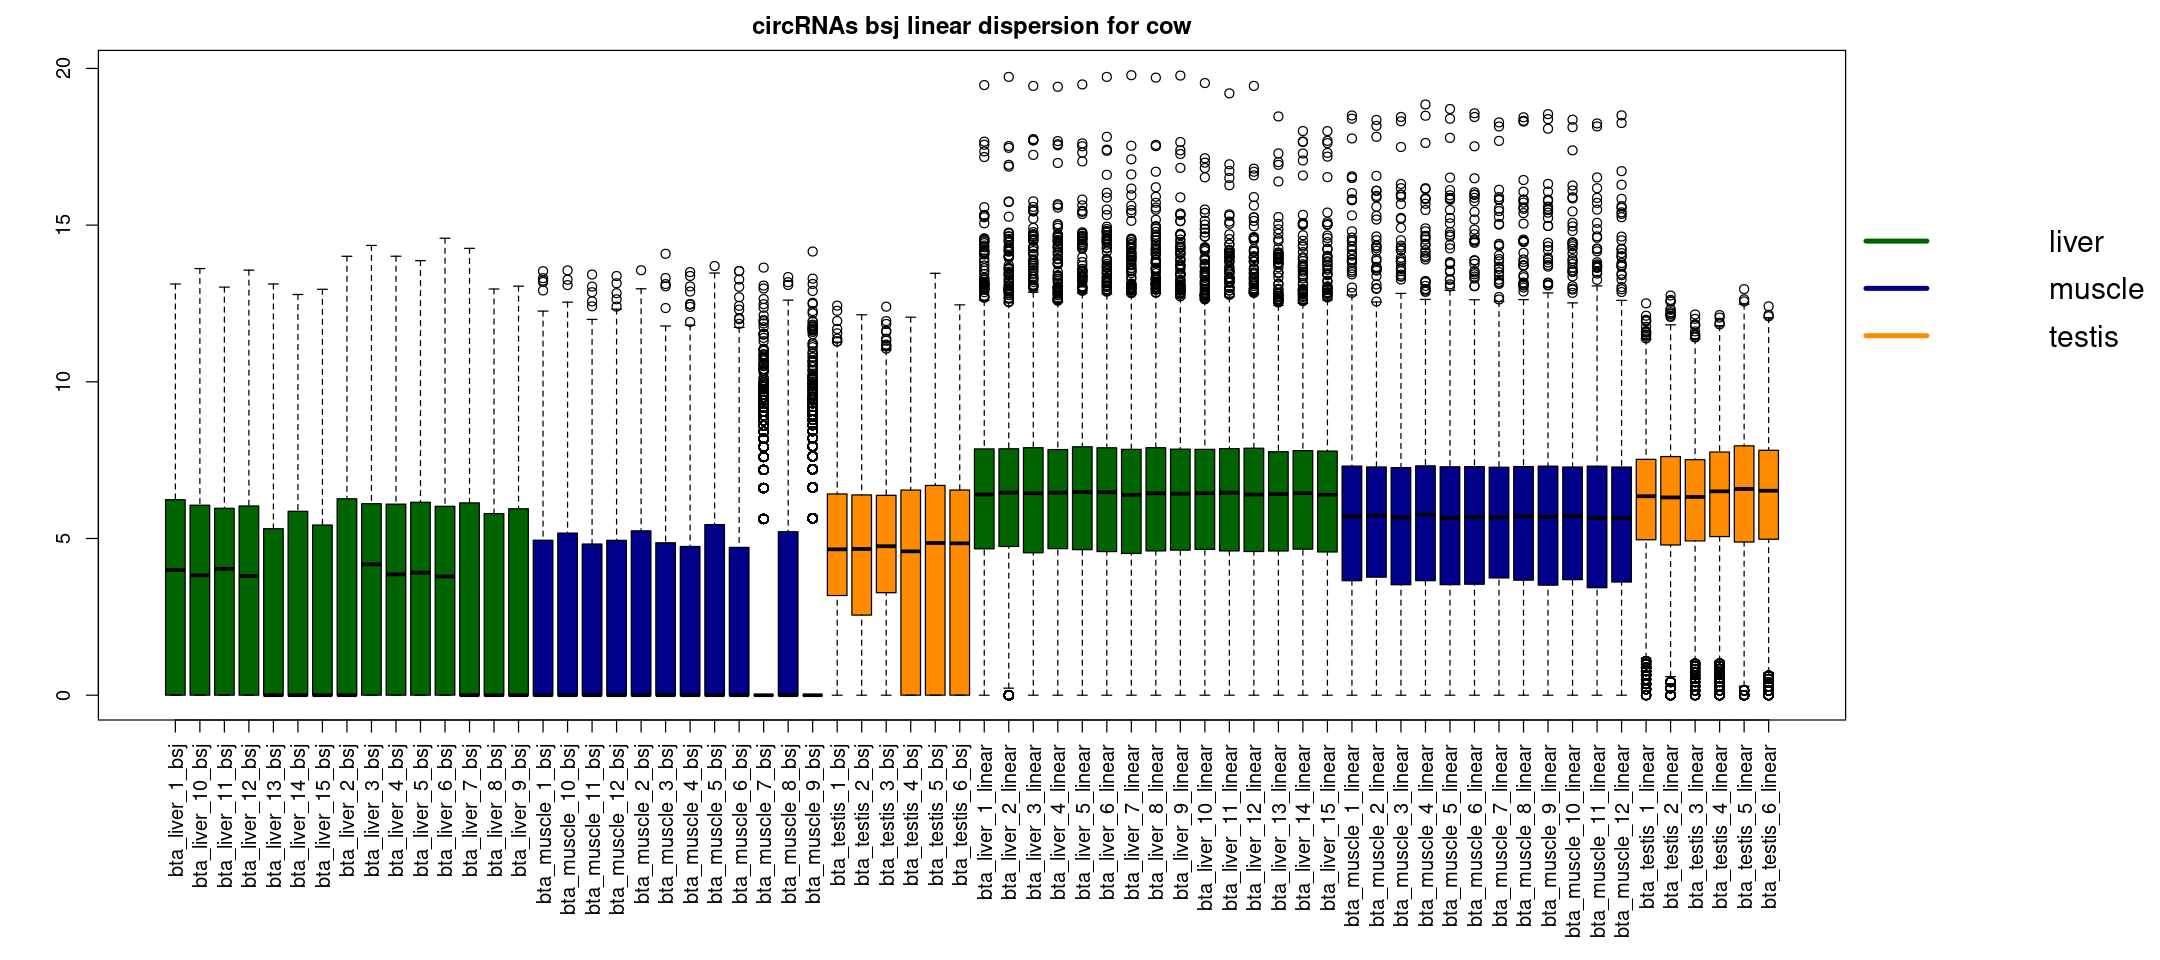

In [7]:
options(repr.plot.width=18, repr.plot.height=8)
colors =  c(rep("darkgreen", 15), rep("darkblue", 12), rep("darkorange", 6), rep("darkgreen", 15), rep("darkblue", 12), rep("darkorange", 6))
par(mar=c(10, 4.1, 2.1, 13.1))
par(xpd=FALSE)
boxplot(pseudoNormCounts, col=colors, las=3, main="circRNAs bsj linear dispersion for cow")
par(xpd=TRUE)
legend(65, 16, legend=c("liver", "muscle", "testis"), col=c("darkgreen", "darkblue", "darkorange"), 
       lty=1:1, lwd=4, cex=1.5, bty = "n", seg.len=0.5)

#### Linear versus circular expression pattern: bta_liver_1

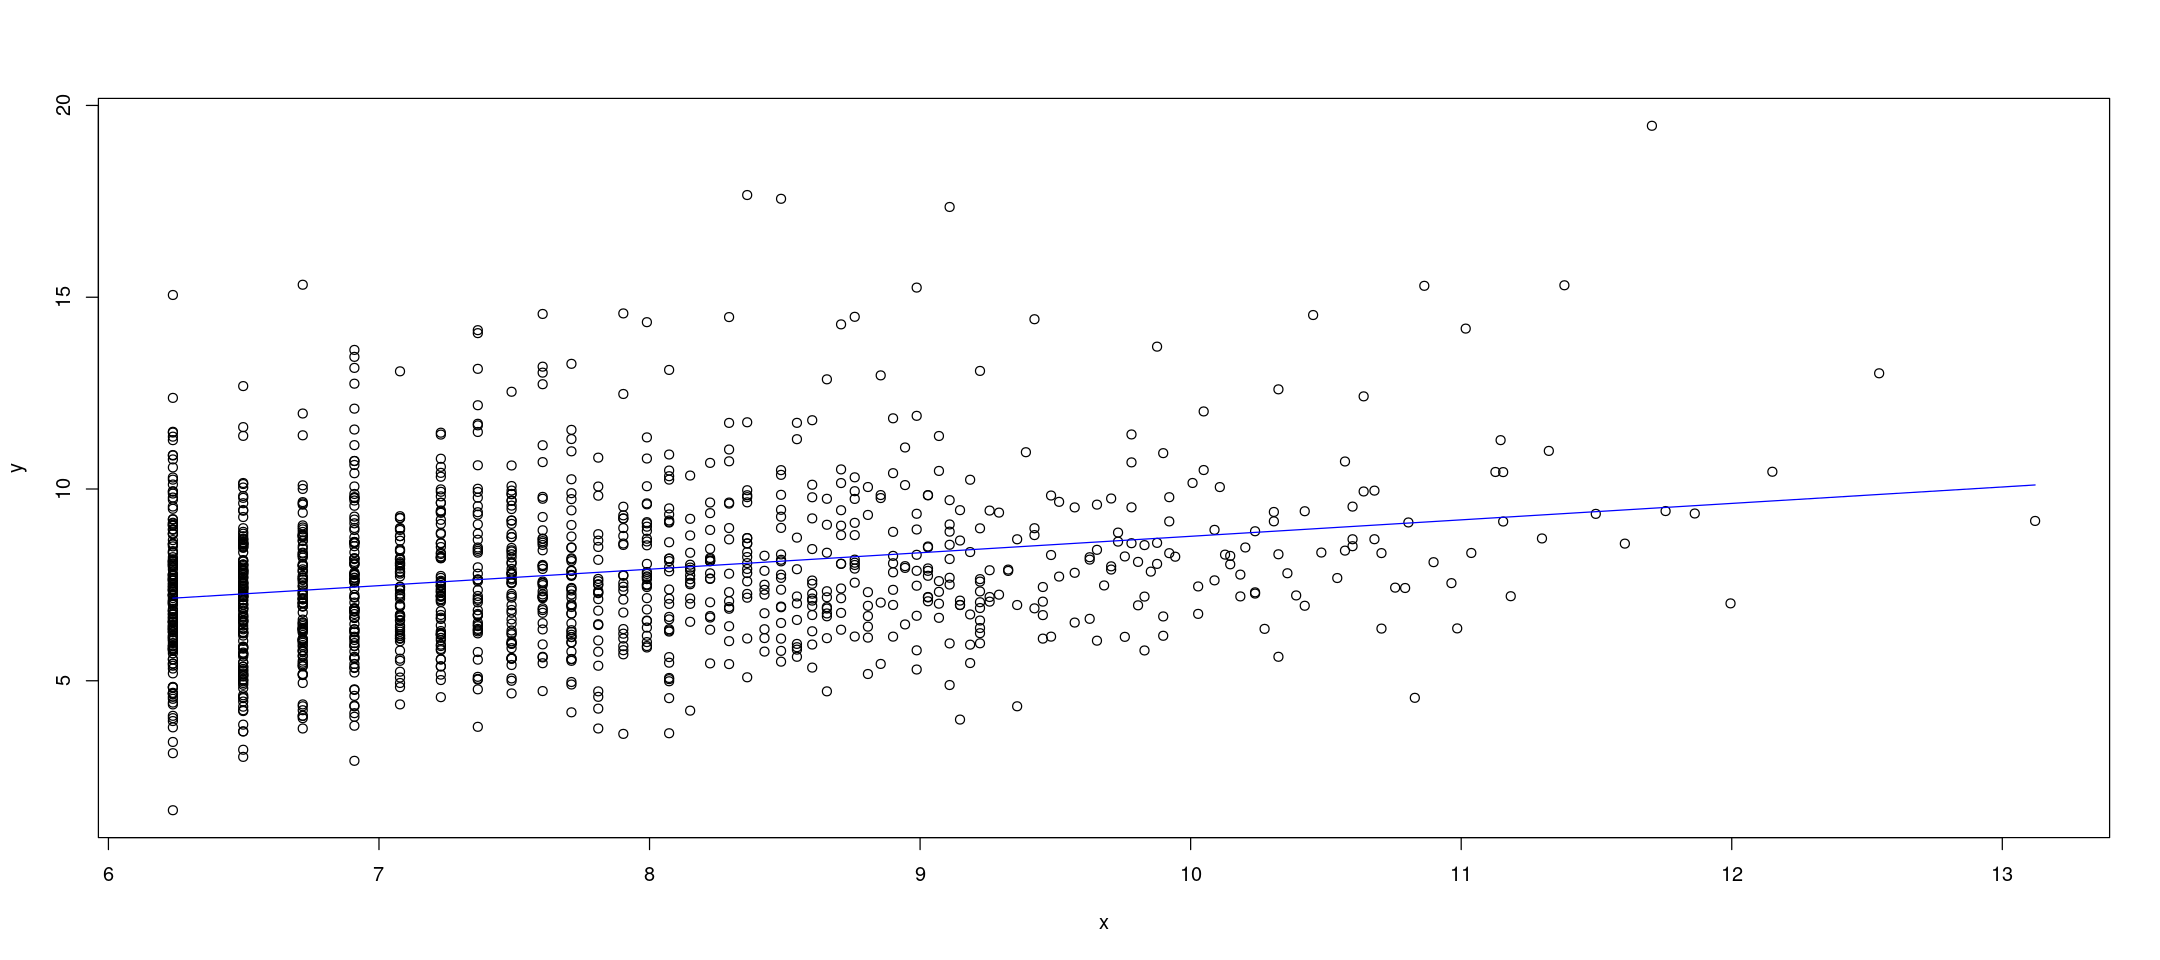

In [8]:
x = pseudoNormCounts[,c("bta_liver_1_bsj")]
y = pseudoNormCounts[,c("bta_liver_1_linear")]
x=x[Counts[,c("bta_liver_1_bsj")]>4]
y=y[Counts[,c("bta_liver_1_bsj")]>4]
model <- lm(y~x)
plot(x,y)
lines(x, predict(model), col = 'blue')

In [ ]:
summary(lm(x ~ y))

In [ ]:
bsj = pseudoNormCounts[, grep(pattern="_bsj", colnames(pseudoNormCounts))]
linear = pseudoNormCounts[, grep(pattern="_linear", colnames(pseudoNormCounts))]

In [ ]:
bsjPCA <- pca(t(bsj), ncomp = 12)
linearPCA <- pca(t(linear), ncomp = 12)

In [ ]:
options(repr.plot.width=14, repr.plot.height=8)
x = bsjPCA$rotation[,1]
y = linearPCA$rotation[,1]
model <- lm(y~x)
plot(x,y)
lines(x, predict(model), col = 'blue')
title("Correlation beween Comp 1 loadings for bsj and fsj PCA")

In [ ]:
summary(lm(x ~ y))

In [ ]:
x = bsjPCA$rotation[,2]
y = linearPCA$rotation[,2]
model <- lm(y~x)
plot(x,y)
lines(x, predict(model), col = 'blue')
title("Correlation beween Comp 2 loadings for bsj and fsj PCA")

In [ ]:
summary(lm(x ~ y))

#### Correlation betwen individuals

In [ ]:
plot(pseudoCounts[,c("bta_liver_1_bsj")], pseudoCounts[,c("bta_liver_2_bsj")])

In [ ]:
plot(pseudoCounts[,c("bta_liver_1_bsj")], pseudoCounts[,c("bta_liver_3_bsj")])

#### Projecting new individuals to a PCA plot
https://stats.stackexchange.com/questions/2592/how-to-project-a-new-vector-onto-pca-space